# Installs and Imports

## Installs

In [15]:
!python --version

Python 3.10.12


## Imports

In [17]:
import time
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from scipy.linalg import svd

# Code:

## 1. Возьмите любую картинку, которая вам нравится

In [18]:
url = "https://i.pinimg.com/564x/04/b2/68/04b26838bdd5e2ba54d0144558685bae.jpg"

In [19]:
response = requests.get(url, timeout=10)
image = Image.open(BytesIO(response.content))

## 2. сконвертируйте в градации серого в действительных числах (float32 например).

In [20]:
image_grey = image.convert("L")

image_array = np.array(image_grey, dtype=np.float32)

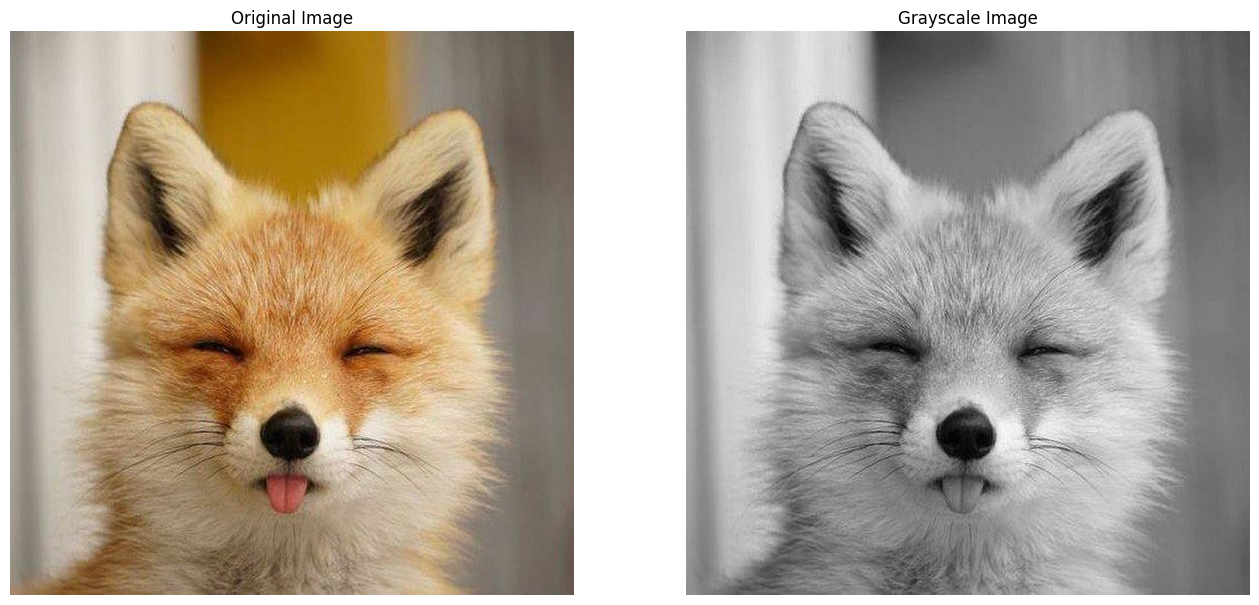

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(image_grey, cmap="gray")
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

plt.show()

## 3. Затем используя SVD разложите на матрицы

In [22]:
U, S, V_t = svd(image_array, full_matrices=True)

In [23]:
S.size

564

## 4. Посчитайте коэффициент сжатия, время сжатия, и ошибку (Frobenius norm) в зависимости от ранга разложения

In [24]:
ranks = np.linspace(1, 150, 10, dtype=int)
compression_ratios, errors, compression_times, images = [], [], [], []
num_repeats = 100

In [25]:
for r in ranks:
    compression_time_list = []

    for _ in range(num_repeats):
        start_comp_time = time.time()
        U_r, S_r, V_t_r = U[:, :r], np.diag(S[:r]), V_t[:r, :]
        compressed_image = np.dot(U_r, np.dot(S_r, V_t_r))
        end_comp_time = time.time()
        compression_time_list.append((end_comp_time - start_comp_time) * 1000)

    compression_time = np.mean(compression_time_list)

    compression_times.append(compression_time)

    original_size = np.prod(image_array.shape)
    compressed_size = U_r.size + S_r.size + V_t_r.size
    compression_ratios.append(original_size / compressed_size)
    errors.append(np.linalg.norm(image_array - compressed_image, ord="fro"))

    images.append(compressed_image)

## 5. Постройте графики для 4

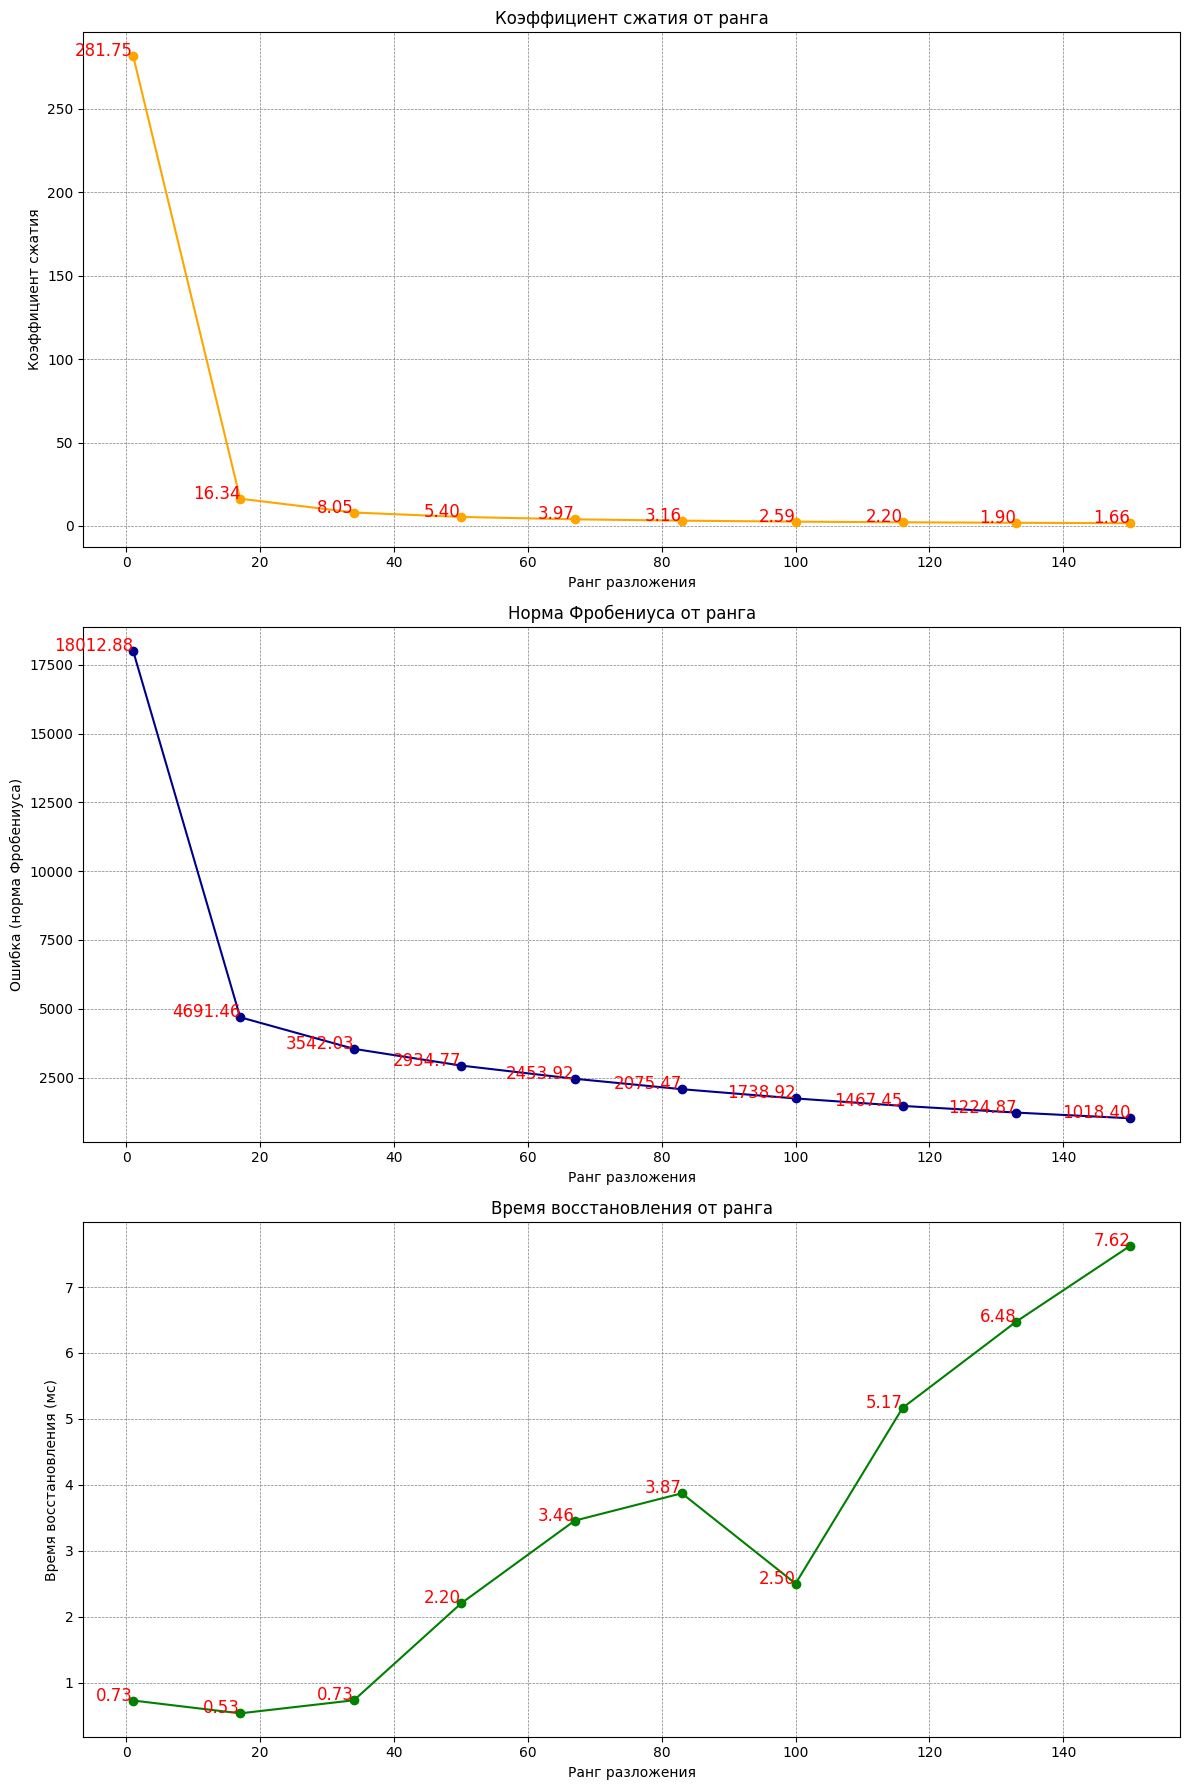

In [26]:
def plot_graph(x, y, color, xlabel, ylabel, title, subplot_index):
    plt.subplot(3, 1, subplot_index)
    plt.plot(x, y, marker="o", color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(color="gray", linestyle="--", linewidth=0.5)

    for i, txt in enumerate(y):
        plt.text(x[i], txt, f"{txt:.2f}", fontsize=12, ha="right", color="red")


plt.figure(figsize=(12, 18))

plot_graph(ranks, compression_ratios, "orange", "Ранг разложения", "Коэффициент сжатия", "Коэффициент сжатия от ранга", 1)
plot_graph(ranks, errors, "darkblue", "Ранг разложения", "Ошибка (норма Фробениуса)", "Норма Фробениуса от ранга", 2)
plot_graph(ranks, compression_times, "green", "Ранг разложения", "Время восстановления (мс)", "Время восстановления от ранга", 3)

plt.tight_layout()
plt.show()

## 6. Восстановите и отобразите картику для нескольких рангов (см. 3)

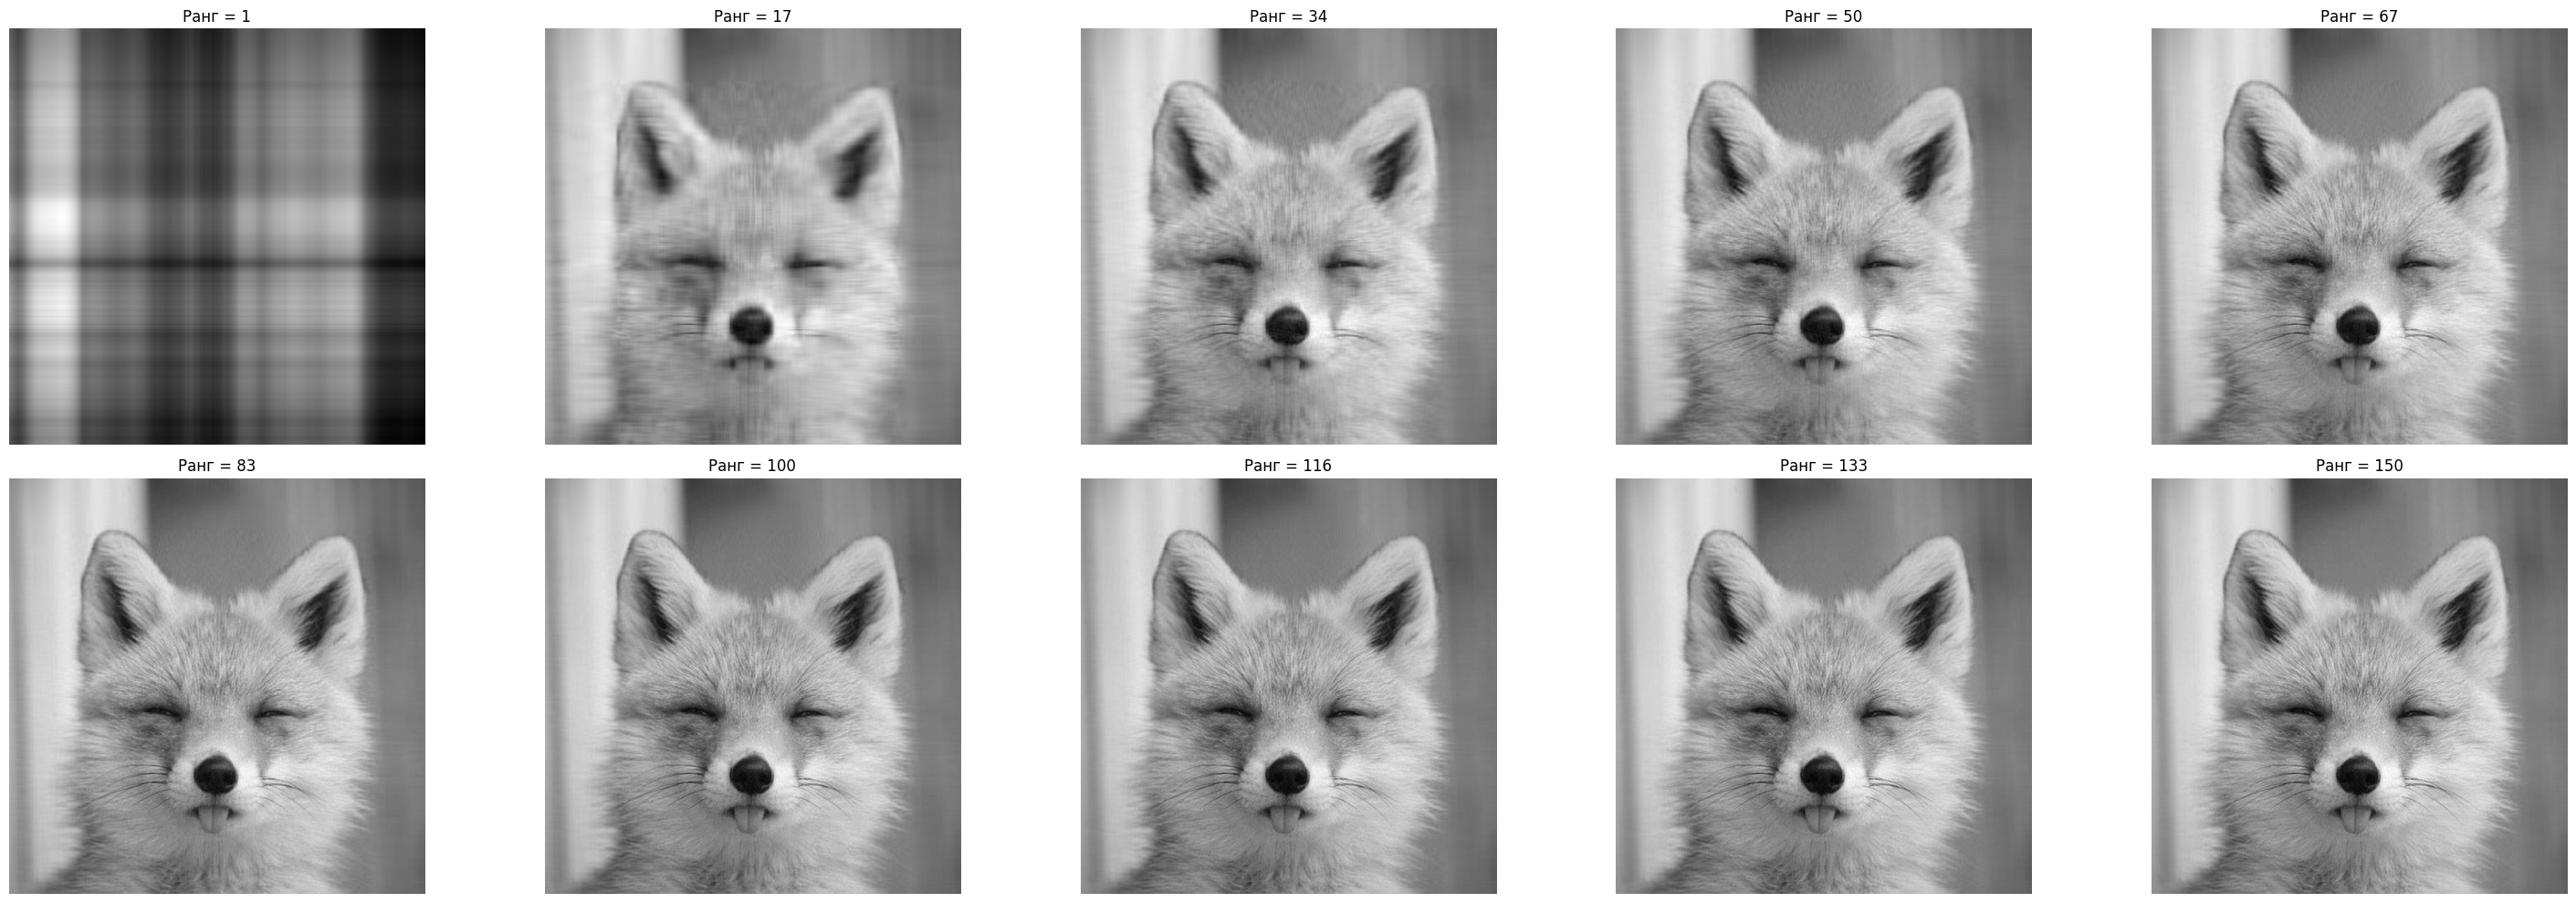

In [27]:
num_images = len(images)

num_rows = 2
num_cols = (num_images + 1) // 2

plt.figure(figsize=(15 * 2, 5 * 2))

for i, img in enumerate(images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Ранг = {ranks[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()